# Visualisation des anomalies

In [1]:
import pandas as pd
import numpy as np

# Plot et Display
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
path_test = "../../4A/Projet/Ensemble de test/"

In [14]:
liste_test = [pd.read_csv(path_test + "test_flight_" + str(num))["FF_1"].values for num in range(300, 428)]

In [13]:
def enlever_pic(serie, seuil=10, pts_moy=2, plot=False) :
    """Retire le pic final, le seuil est le plus petit accroissement considéré comme appartenant
    encore au pic. Les accroissements sont moyennés sur plusieurs points pour ne pas être sensibles 
    aux possibles irrégularités dans le pic.
    L'option plot=True permet de vérifier graphiquement le résultat.
    Retourne la liste tronquée"""
    serie = np.array(serie)
    if plot :
        plt.plot(serie)
        
    accr = abs(serie[1:] - serie[:-1])
    moy_accr = [np.mean(accr[i : i + pts_moy]) for i in range(len(accr) - pts_moy)]

    for ind, val in enumerate(moy_accr[::-1]) :
        if val < seuil and ind >= 1 :
            if plot :
                plt.plot(serie[:-ind], color="red")
                plt.show()
                
            return list(serie[:-ind])
            break
    else : 
        return serie

In [17]:
liste_test = [enlever_pic(serie) for serie in liste_test]
n = len(liste_test)

In [19]:
anom = [False] * n
type_anom = [-1] * n
loc = [-1] * n

anom[73] = True
type_anom[73] = 1
loc[73] = 200

anom[96] = True
type_anom[96] = 1
loc[96] = 300

anom[36] = True
type_anom[36] = 1
loc[36] = 400

anom[32] = True
type_anom[32] = 1
loc[32] = 300

anom[33] = True
type_anom[33] = 1
loc[33] = 200

anom[107] = True
type_anom[107] = 2
loc[107] = 600

anom[60] = True
type_anom[60] = 2
loc[60] = 400

anom[113] = True
type_anom[113] = 2
loc[113] = 400

anom[9] = True
type_anom[9] = 2
loc[9] = 200

anom[11] = True
type_anom[11] = 2
loc[11] = 300

anom[53] = True
type_anom[53] = 3
loc[53] = 400

anom[114] = True
type_anom[114] = 3
loc[114] = 400

anom[14] = True
type_anom[14] = 3
loc[14] = 500

anom[79] = True
type_anom[79] = 3
loc[79] = 400

anom[29] = True
type_anom[29] = 3
loc[29] = 300

anom[27] = True
type_anom[27] = 4
loc[27] = 300

anom[121] = True
type_anom[121] = 4
loc[121] = 300

anom[5] = True
type_anom[5] = 4
loc[5] = 400

anom[89] = True
type_anom[89] = 4
loc[89] = 200

anom[99] = True
type_anom[99] = 4
loc[99] = 100  

In [20]:
data_anom = pd.DataFrame(data={"id" : range(128), "valeurs" : liste_test,
                               "anom" : anom, "type" : type_anom, "loc" : loc}).set_index(["id"])

data_anom

,valeurs,anom,type,loc
id,,,,
0,"[1432.0, 1432.0, 1432.0, 1432.0, 1424.0, 1416....",False,-1,-1
1,"[1400.0, 1408.0, 1416.0, 1400.0, 1392.0, 1384....",False,-1,-1
2,"[1416.0, 1408.0, 1416.0, 1424.0, 1424.0, 1416....",False,-1,-1
3,"[1392.0, 1392.0, 1392.0, 1400.0, 1400.0, 1400....",False,-1,-1
4,"[1408.0, 1400.0, 1400.0, 1392.0, 1392.0, 1384....",False,-1,-1
5,"[1432.0, 1432.0, 1440.0, 1432.0, 1416.0, 1416....",True,4,400
6,"[1408.0, 1408.0, 1392.0, 1392.0, 1392.0, 1392....",False,-1,-1
7,"[1384.0, 1392.0, 1400.0, 1400.0, 1400.0, 1408....",False,-1,-1
8,"[1400.0, 1400.0, 1408.0, 1400.0, 1400.0, 1392....",False,-1,-1


In [29]:
def plot_anom_type(Type):
    for num in range(128):
        TS = data_anom.loc[num]
        loc = TS["loc"]
        serie = TS["valeurs"]

        if TS["type"] == Type: 
            fig, ax = plt.subplots(figsize=(12, 7))
            plt.title("Série numéro " + str(num) + ", type " + str(Type), size=20, color='r', fontweight='bold')

            ax.plot(range(loc), serie[: loc], 'b')
            ax.plot(range(loc - 1, loc + 56), serie[loc - 1 : loc + 56], 'r')
            ax.plot(range(loc + 55, len(serie)), serie[loc + 55 :], 'b')

        plt.show()

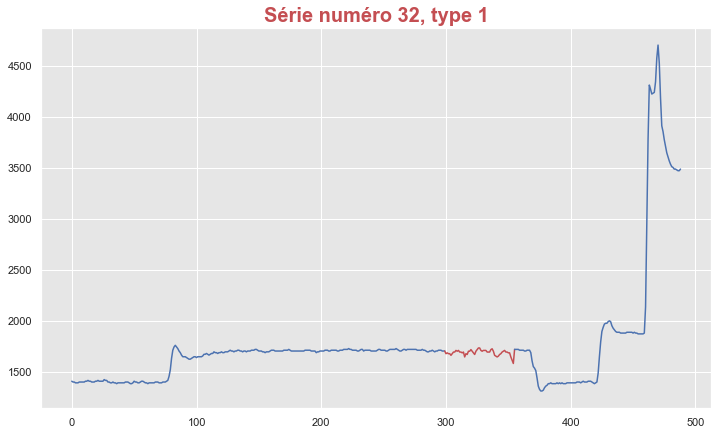

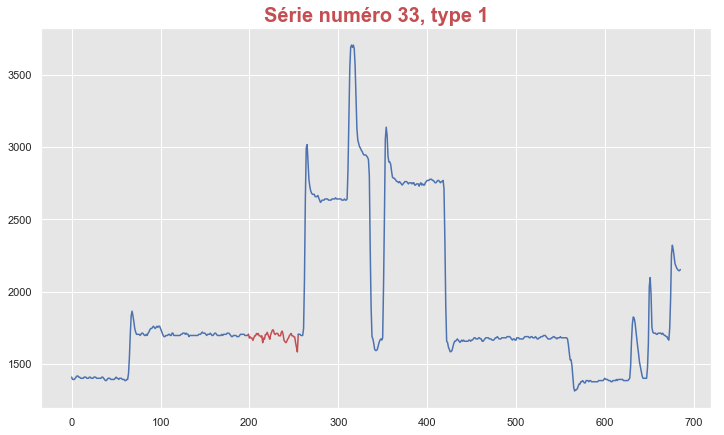

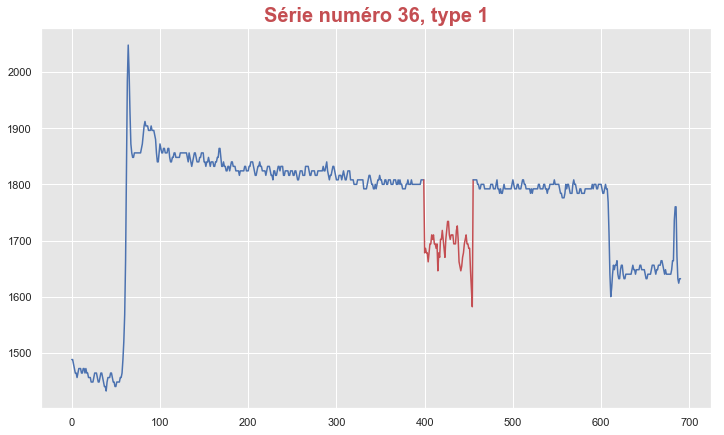

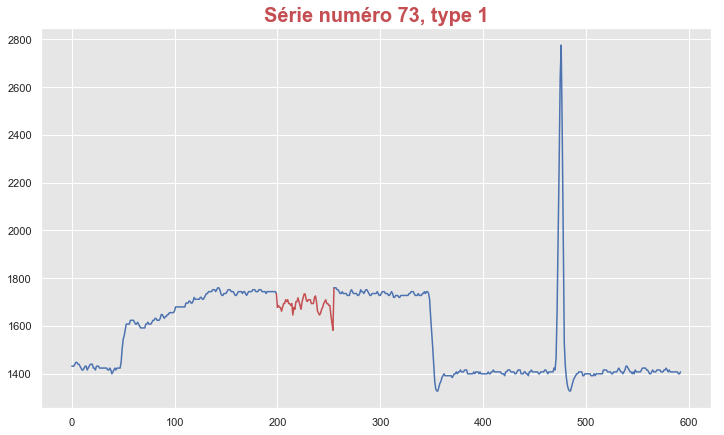

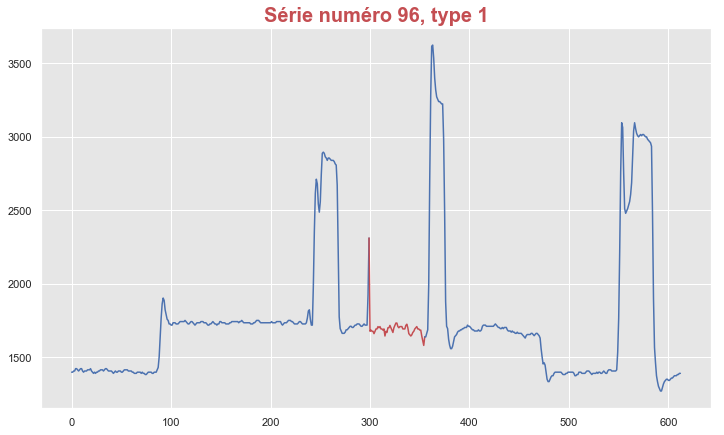

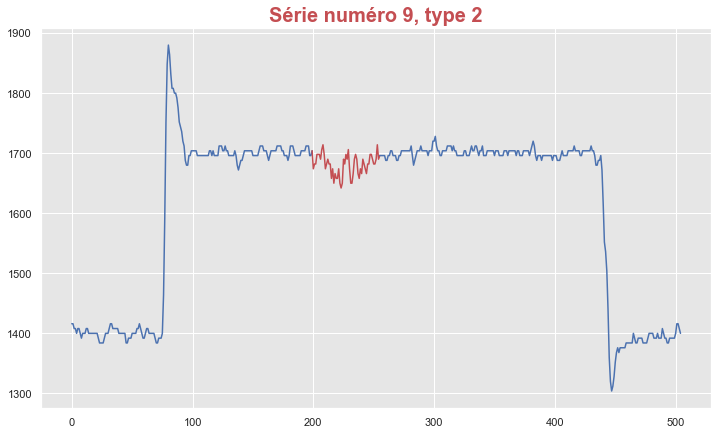

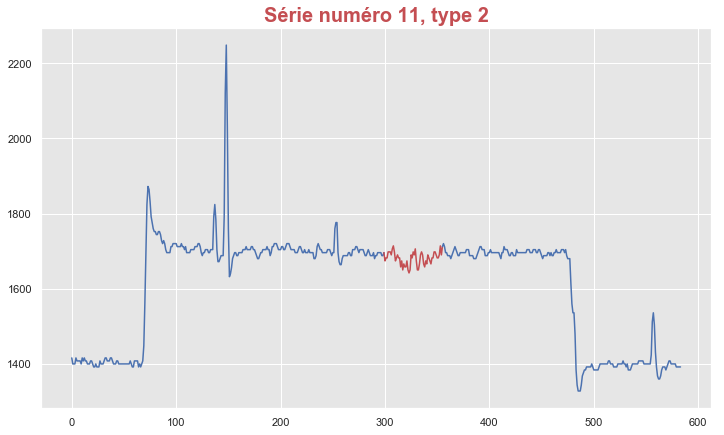

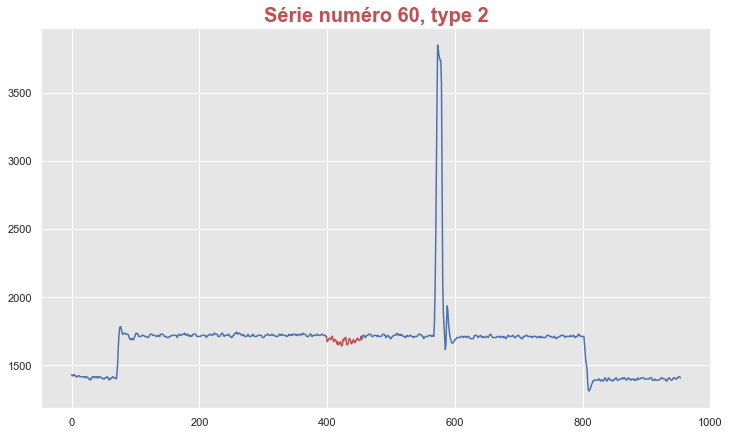

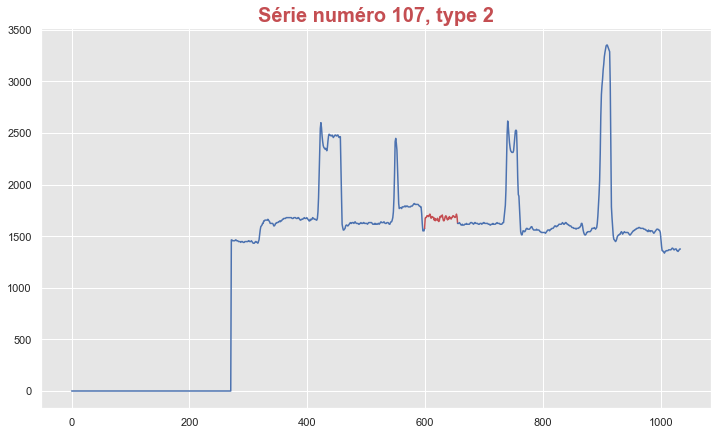

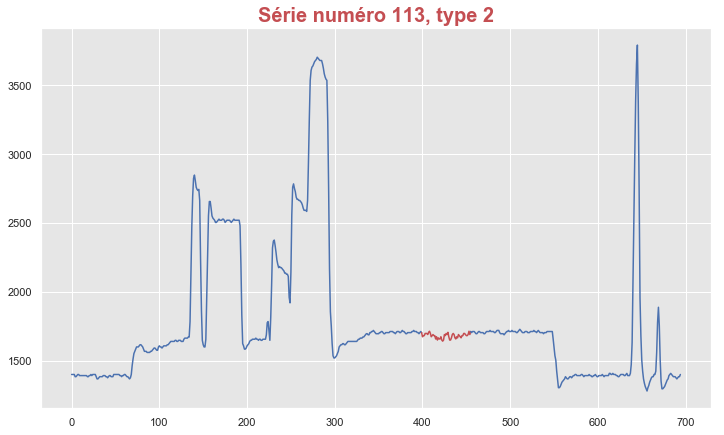

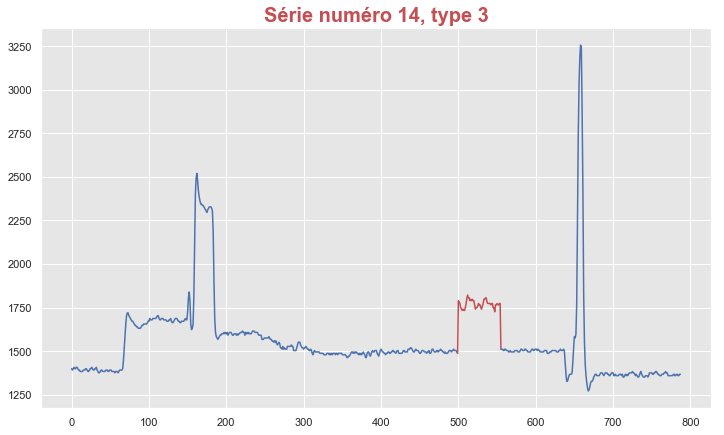

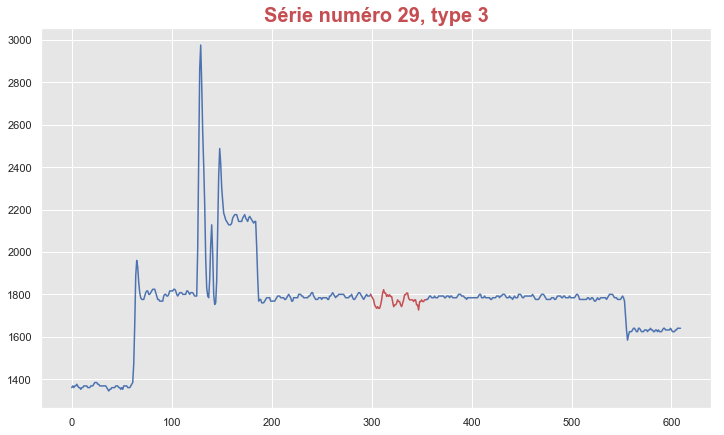

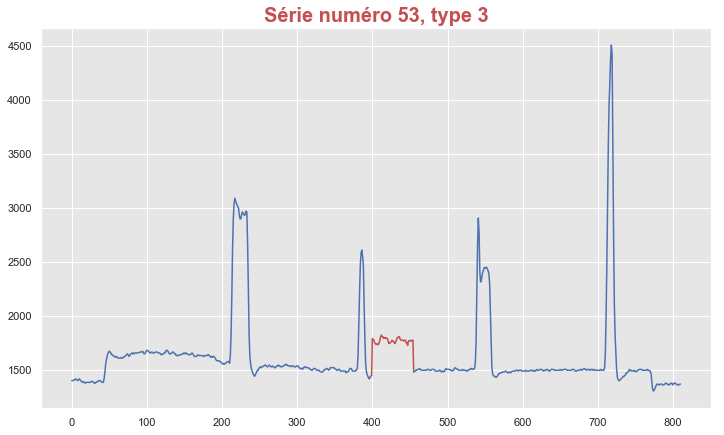

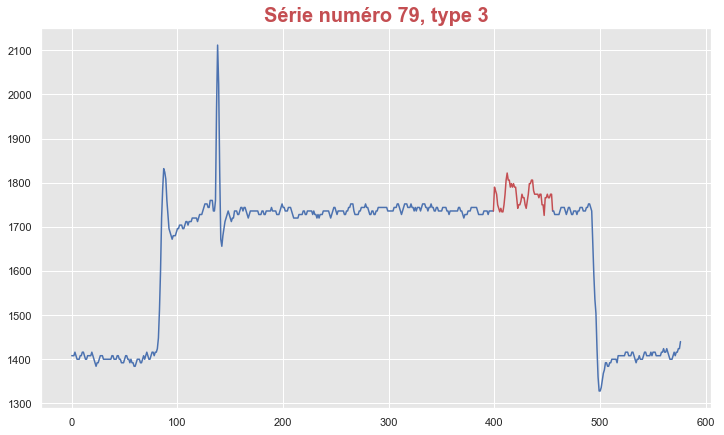

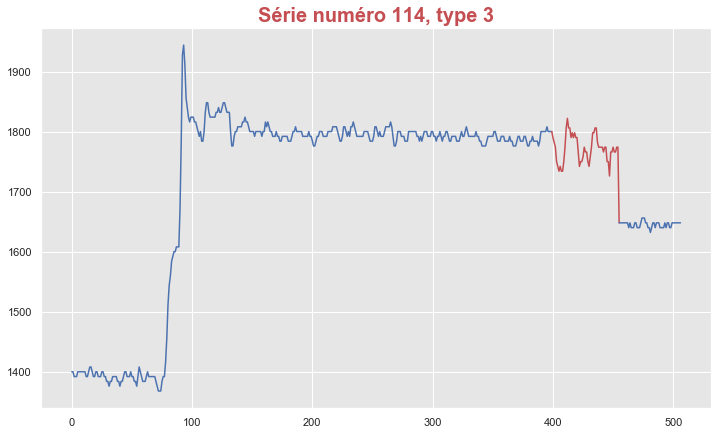

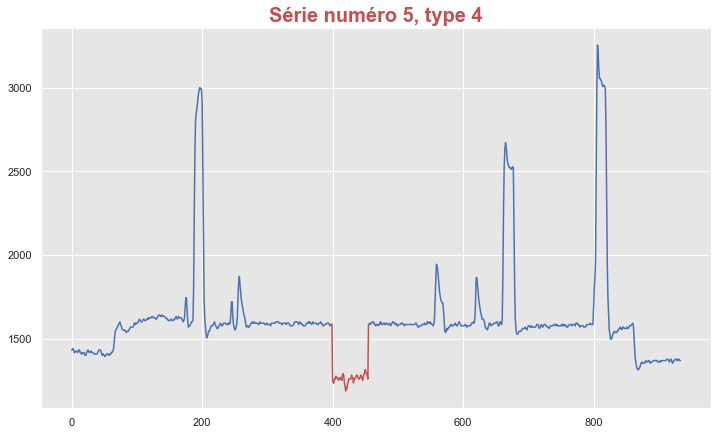

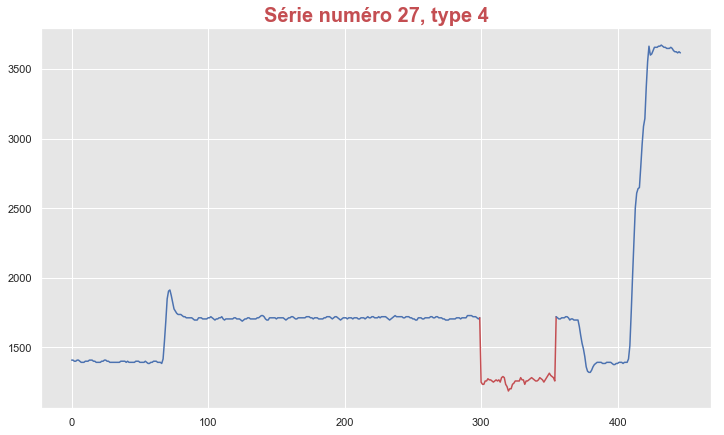

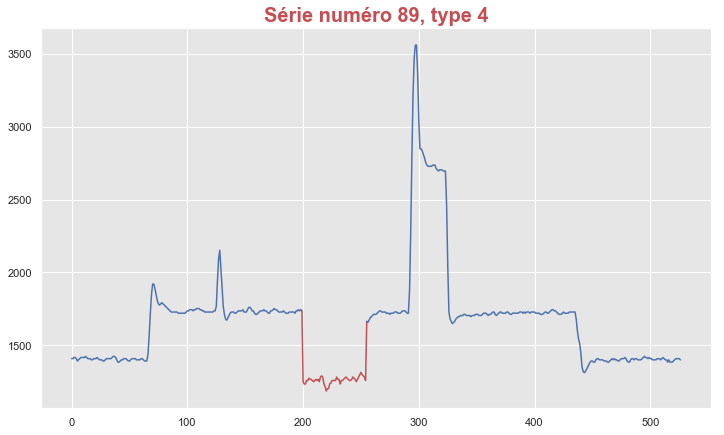

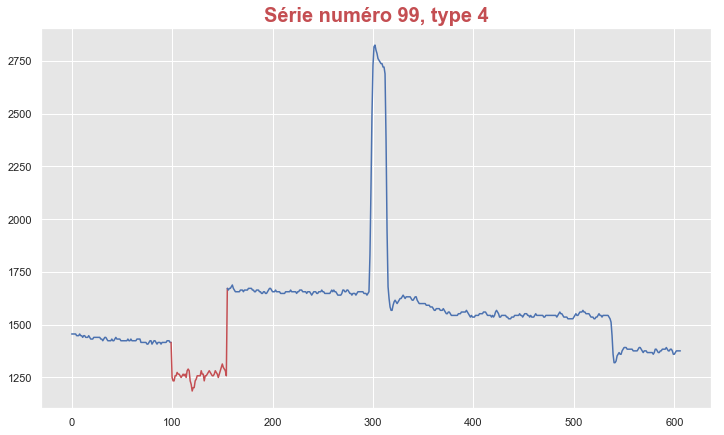

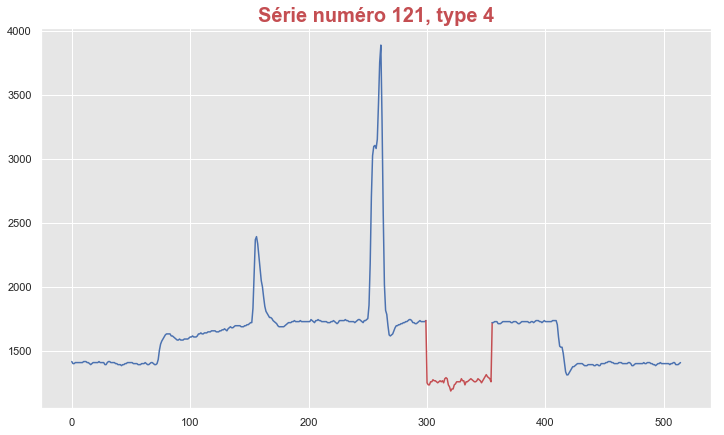

In [30]:
for T in range(1, 5):
    plot_anom_type(T)